### Evaluation of preprocessing

Successfully converted everything to be numerical 
Gonna have to change the los from a duration type to number of days with float type 
Other than that, loading the saved pre-processed dataframes and plugging them into sklearn instantiations is working so far 

#### Dimensionality reduction

In [1]:
# Feature extraction to create new features that are combinations of original ones 
#(to decrease overfitting but increases training and prediction time)

In [ ]:
# 5 out of 20 need reduction (LOS)

Truncated Singular Value Decomposition (SVD):

SVD is a matrix factorization technique that can handle sparse matrices efficiently.
It decomposes the sparse matrix into three matrices: U, Σ, and V^T, where Σ contains the singular values.
By truncating the number of singular values, you can reduce the dimensionality of the data while retaining the most significant information.
SVD is commonly used for latent semantic analysis (LSA) in natural language processing (NLP) tasks.

Non-negative Matrix Factorization (NMF):

NMF is a matrix factorization technique that decomposes the sparse matrix into two non-negative matrices: W and H.
It assumes that the original data and the factors are non-negative, making it suitable for count-based data such as text documents.
NMF can provide interpretable low-dimensional representations, as the resulting factors are non-negative and additive.

Sparse PCA:

Sparse PCA extends PCA to handle sparse data efficiently.
It introduces sparsity constraints on the loadings matrix, encouraging many loadings to be zero.
Sparse PCA is useful when you want a more interpretable solution with only a subset of features contributing to each principal component.

Random Projection:

Random projection is a technique that projects high-dimensional data onto a lower-dimensional subspace using random matrices.
It preserves pairwise distances between data points approximately, making it suitable for dimensionality reduction tasks.
Random projection is computationally efficient and can handle very high-dimensional data, including sparse matrices.

Sparse Coding:

Sparse coding is a technique that learns a sparse representation of data using overcomplete dictionaries.
It encourages the learned representations to be sparse, meaning that only a small number of dictionary elements are activated for each input.
Sparse coding can be applied to sparse matrices to learn compact representations while maintaining sparsity.

Chose to use truncatedSVD as it is fast and shows a high preservation of variance, more explainable than the others but only really compared them all on the omr dataframe for times sake 

#### Planning for feature selection next stage (informative features)

In [ ]:
# Correlation plots for dfs with fewer features 

In [ ]:
# Look up how to assess feature importance after the model has been trained 

#### L1 lasso and L2 ridge regularization (ElasticNet regression)

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
# External libraries for data processing
import numpy as np
import pandas as pd
import sklearn as sk
#To render graphs within notebook
%matplotlib inline
import matplotlib.pyplot as plt
import joblib 
import os

# Versions of libraries
print("Numpy version: {}".format(np.__version__))
print("Pandas version: {}".format(pd.__version__))
print("Scikit version: {}".format(sk.__version__))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer

Numpy version: 1.24.3
Pandas version: 1.5.3
Scikit version: 1.3.0


In [17]:
path = "C:/Users/jenni/OneDrive/Desktop/IP/"
file = "omr_data_train.csv"
full_path = path + file

omr_data_train = pd.read_csv(full_path)

file = "omr_data_test.csv"
full_path = path + file

omr_data_test = pd.read_csv(full_path)

file = "omr_label_train.csv"
full_path = path + file

omr_label_train = pd.read_csv(full_path)

file = "omr_label_test.csv"
full_path = path + file

omr_label_test = pd.read_csv(full_path)

#### Truncated SVD

In [18]:
from sklearn.decomposition import TruncatedSVD

# Number of desired features (components)
n_components = 12

# Initialize Truncated SVD with the desired number of components
svd = TruncatedSVD(n_components=n_components)

# Fit the Truncated SVD model to the sparse matrix and transform the data
svd.fit(omr_data_train)
X_train = svd.transform(omr_data_train)

# Get the explained variance ratio (how much variance is explained by each component)
explained_variance_ratio = svd.explained_variance_ratio_

# Print the transformed matrix and explained variance ratio
# print("Transformed Matrix:")
# print(transformed_matrix)
print("\nExplained Variance Ratio:")
print(explained_variance_ratio)

print("\n Amount of original variance conserved for train:", np.sum(svd.explained_variance_ratio_))


Explained Variance Ratio:
[0.33342246 0.10604019 0.08112752 0.04986411 0.04427746 0.03792258
 0.03462333 0.03055396 0.02590173 0.02647113 0.02490915 0.02347853]

 Amount of original variance conserved for train: 0.8185921258461283


In [19]:
# Function to extract total number of days from duration string
def extract_days(duration_str):
    # Split duration string by whitespace
    parts = duration_str.split()
    # Extract number of days from the first part
    days = int(parts[0])
    # Extract hours and minutes from the second part
    hours, minutes = map(int, parts[2].split(':')[:2])
    # Calculate total number of days including fractional part for hours and minutes
    total_days = days + (hours / 24) + (minutes / (24 * 60))
    return total_days

# Convert duration column to total number of days
omr_label_train['los'] = omr_label_train['los'].apply(extract_days)
omr_label_test['los'] = omr_label_test['los'].apply(extract_days)

# Display DataFrame
# print(omr_label_train)

Mean Squared Error: 30.94089805905587


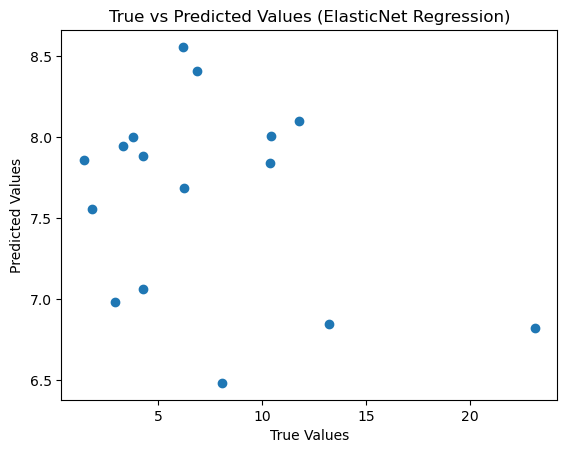

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


X_train = svd.transform(omr_data_train)
X_test = svd.transform(omr_data_test)
y_train = omr_label_train
y_test = omr_label_test

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the ElasticNet model
alpha = 0.1  # Regularization strength
l1_ratio = 0.5  # Mixing parameter for L1 and L2 penalties (0.5 for equal penalties)
elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
elastic_net.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = elastic_net.predict(X_test_scaled)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plot true vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values (ElasticNet Regression)")
plt.show()

In [46]:
path = "C:/Users/jenni/OneDrive/Desktop/IP/"

file = "admissions_data_train.csv"
full_path = path + file
admissions_data_train = pd.read_csv(full_path)

file = "admissions_data_test.csv"
full_path = path + file
admissions_data_test = pd.read_csv(full_path)

file = "admissions_label_train.csv"
full_path = path + file
admissions_label_train = pd.read_csv(full_path)

file = "admissions_label_test.csv"
full_path = path + file
admissions_label_test = pd.read_csv(full_path)

In [48]:
admissions_label_train['los'] = admissions_label_train['los'].apply(extract_days)
admissions_label_test['los'] = admissions_label_test['los'].apply(extract_days)
admissions_data_train['ed_duration'] = admissions_data_train['ed_duration'].apply(extract_days)
admissions_data_test['ed_duration'] = admissions_data_test['ed_duration'].apply(extract_days)

Mean Squared Error: 34.2859971753327


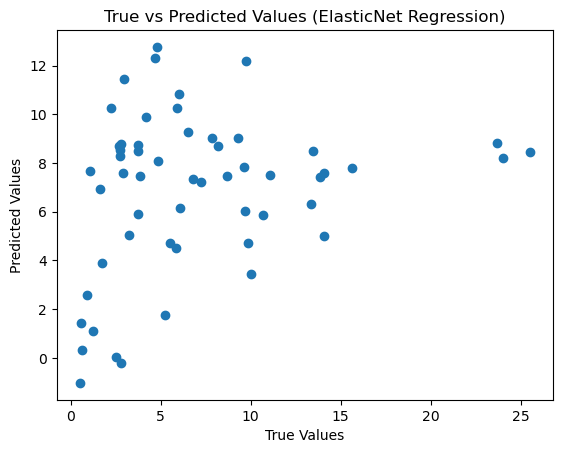

In [50]:
X_train = admissions_data_train
X_test = admissions_data_test
y_train = admissions_label_train
y_test = admissions_label_test

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the ElasticNet model
alpha = 0.1  # Regularization strength
l1_ratio = 0.5  # Mixing parameter for L1 and L2 penalties (0.5 for equal penalties)
elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
elastic_net.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = elastic_net.predict(X_test_scaled)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plot true vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values (ElasticNet Regression)")
plt.show()

emar_detail

In [66]:
path = "C:/Users/jenni/OneDrive/Desktop/IP/"

file = "emar_detail_data_train.csv"
full_path = path + file
emar_detail_data_train = pd.read_csv(full_path)

file = "emar_detail_data_test.csv"
full_path = path + file
emar_detail_data_test = pd.read_csv(full_path)

file = "emar_detail_label_train.csv"
full_path = path + file
emar_detail_label_train = pd.read_csv(full_path)

file = "emar_detail_label_test.csv"
full_path = path + file
emar_detail_label_test = pd.read_csv(full_path)

In [67]:
emar_detail_label_train['los'] = emar_detail_label_train['los'].apply(extract_days)
emar_detail_label_test['los'] = emar_detail_label_test['los'].apply(extract_days)

Mean Squared Error: 25.637920265785418


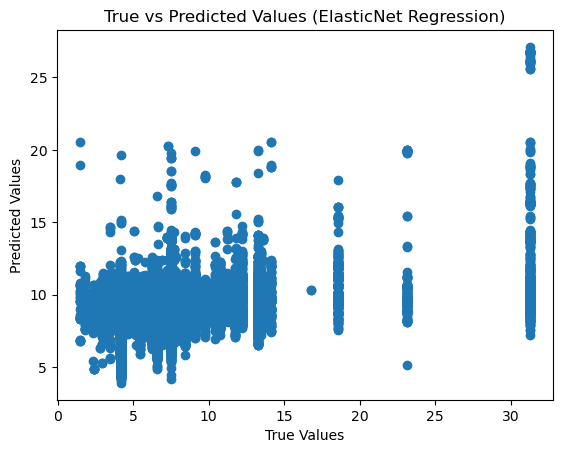

In [68]:
X_train = emar_detail_data_train
X_test = emar_detail_data_test
y_train = emar_detail_label_train
y_test = emar_detail_label_test

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the ElasticNet model
alpha = 0.1  # Regularization strength
l1_ratio = 0.5  # Mixing parameter for L1 and L2 penalties (0.5 for equal penalties)
elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
elastic_net.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = elastic_net.predict(X_test_scaled)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plot true vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values (ElasticNet Regression)")
plt.show()

#### Attempt of regression model (expect overfitting)

Mean Squared Error: 27.600932594619753


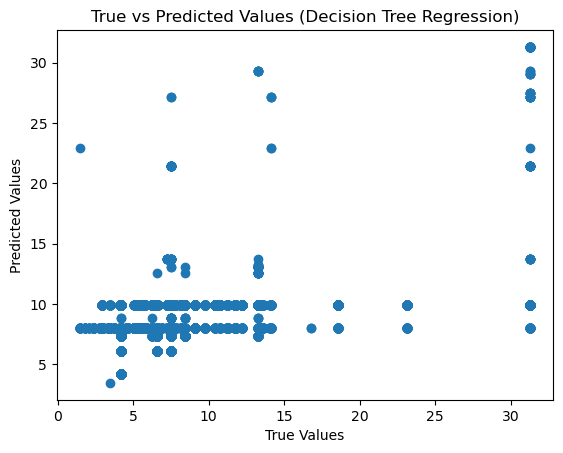

In [72]:
from sklearn.tree import DecisionTreeRegressor
# Initialize and fit the decision tree regression model
decision_tree = DecisionTreeRegressor(max_depth=5, random_state=42)
decision_tree.fit(X_train, y_train)

# Predict on the test set
y_pred = decision_tree.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plot true vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values (Decision Tree Regression)")
plt.show()

# plt.scatter(X_test, y_test, c='b', label='True Values')
# plt.scatter(X_test, y_pred, c='r', label='Predicted Values')
# plt.xlabel("X")
# plt.ylabel("y")
# plt.title("True vs Predicted Values (Decision Tree Regression)")
# plt.legend()
# plt.show()

In [ ]:
# Each dataframe might have better performance with different algorithms
# Start by using the same for all but then can refine by trying all for each 

#### Ensemble methods notes

In [ ]:
# Read papers for ensemble methods for hospital data

In [ ]:
# Give higher weighting to the ones that have lower MSE to calculate weighted average of all the predictions 